In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
telecom_cust = pd.read_csv('C:\\Users\\Butterfly\\Desktop\\Project\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#to know the column names 
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [3]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
plot_churn=df2['Churn'].value_counts()
plot_churn 

0    5163
1    1869
Name: Churn, dtype: int64

# InternetService


In [9]:
df2['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [14]:
df2['InternetService'].replace(to_replace='Fiber optic', value=1, inplace=True)# replace the OFC DSL No with 1 0 2
df2['InternetService'].replace(to_replace='DSL',  value=0, inplace=True)
df2['InternetService'].replace(to_replace='No',  value=2, inplace=True)

In [17]:
df_internet=df2['InternetService'].value_counts()
df_internet

1    3096
0    2416
2    1520
Name: InternetService, dtype: int64

In [16]:
df_internetDSL=df2[df2['InternetService']==0]  # DSL=0 OFC=1 N0=2
df_internetDSL
df_internetFiber=df2[df2['InternetService']==1]
df_internetFiber
df_internetNo=df2[df2['InternetService']==2]
df_internetNo

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [19]:
df_internetDSLChurn_Count=df_internetDSL['Churn'].value_counts()  # DSL Churn Count
df_internetDSLChurn_Count

0    1957
1     459
Name: Churn, dtype: int64

In [20]:
df_internetOFCChurn_Count=df_internetFiber['Churn'].value_counts()  # OFC Churn Count
df_internetOFCChurn_Count

0    1799
1    1297
Name: Churn, dtype: int64

In [21]:
df_NointernetChurn_Count=df_internetNo['Churn'].value_counts()  # No Internet service Churn Count
df_NointernetChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

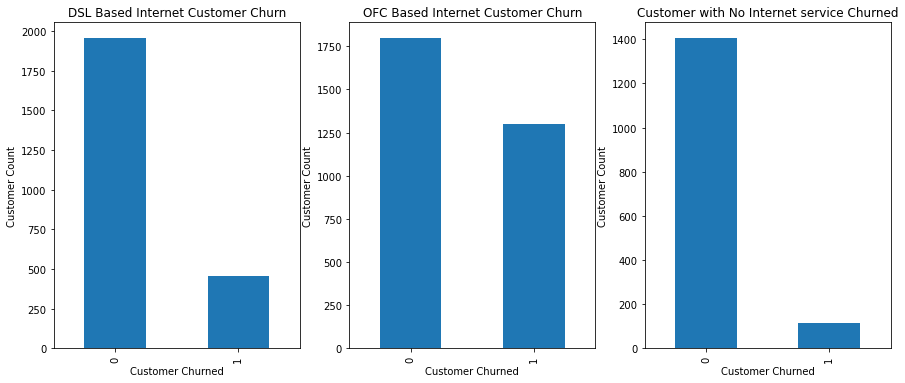

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_internetDSLChurn_Count.plot(kind="bar")
plt.title("DSL Based Internet Customer Churn")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_internetOFCChurn_Count.plot(kind="bar")
plt.title("OFC Based Internet Customer Churn")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NointernetChurn_Count.plot(kind="bar")
plt.title("Customer with No Internet service Churned")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

from the customer using internet service ,there is two types of service that company provide OFC and DSL from analysis we know that 78% are using the internet service

Based on the analysis , there is almost 72% of customers are churned from the OFC based internet connection


# OnlineSecurity

From the dataset 78% of customers subscribed Online Security service 

In [28]:
df_OnlineSecurity=df2['OnlineSecurity'].value_counts()
df_OnlineSecurity

1    3497
0    2015
2    1520
Name: OnlineSecurity, dtype: int64

In [46]:
df2['OnlineSecurity'].replace(to_replace='No', value=0, inplace=True)# replace the NO Yes No internet service with 0 1 2
df2['OnlineSecurity'].replace(to_replace='Yes',  value=1, inplace=True)
df2['OnlineSecurity'].replace(to_replace='No internet service',  value=2, inplace=True)

In [47]:
df_OnlineSecurityNO=df2[df2['OnlineSecurity']==0]  # No=0 Yes=1 No internet service=2
df_OnlineSecurityNO
df_OnlineSecurityYES=df2[df2['OnlineSecurity']==1]
df_OnlineSecurityYES
df_NOOnlineSecurity=df2[df2['OnlineSecurity']==2]
df_NOOnlineSecurity

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [51]:
df_OnlineSecurityNOChurn_Count=df_OnlineSecurityNO['Churn'].value_counts()  # NO ONlineSecurity Churn Count
df_OnlineSecurityNOChurn_Count

0    1720
1     295
Name: Churn, dtype: int64

In [52]:
df_OnlineSecurityYESChurn_Count=df_OnlineSecurityYES['Churn'].value_counts()  # YES ONlineSecurity Churn Count
df_OnlineSecurityYESChurn_Count

0    2036
1    1461
Name: Churn, dtype: int64

In [53]:
df_NoOnlineSecurityChurn_Count=df_NOOnlineSecurity['Churn'].value_counts()  # NO Internet Service Churn Count
df_NoOnlineSecurityChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

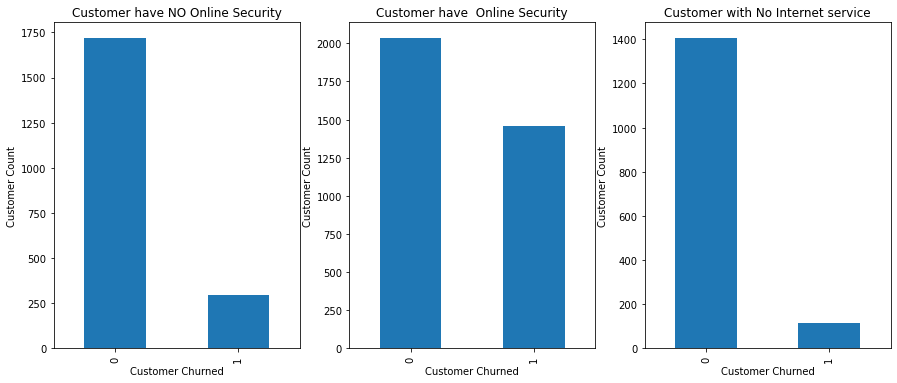

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_OnlineSecurityNOChurn_Count.plot(kind="bar")
plt.title("Customer have NO Online Security")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_OnlineSecurityYESChurn_Count.plot(kind="bar")
plt.title("Customer have  Online Security")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NoOnlineSecurityChurn_Count.plot(kind="bar")
plt.title("Customer with No Internet service")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

Based on the analysis , there is almost 74% of customers are churned, and they are subscribed Online Security service


# OnlineBackup

From the dataset there is only 34% customers subscribe the Online Backup Service

In [38]:
df_OnlineBackup=df2['OnlineBackup'].value_counts()
df_OnlineBackup

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [55]:
df2['OnlineBackup'].replace(to_replace='No', value=0, inplace=True)# replace the NO Yes No internet service with 0 1 2
df2['OnlineBackup'].replace(to_replace='Yes',  value=1, inplace=True)
df2['OnlineBackup'].replace(to_replace='No internet service',  value=2, inplace=True)

In [56]:
df_OnlineBackupNO=df2[df2['OnlineBackup']==0]  # No=0 Yes=1 No internet service=2
df_OnlineBackupNO
df_OnlineBackupYES=df2[df2['OnlineBackup']==1]
df_OnlineBackupYES
df_NoInternetServ=df2[df2['OnlineBackup']==2]
df_NoInternetServ

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,2,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [57]:
df_OnlineBackupNOChurn_Count=df_OnlineBackupNO['Churn'].value_counts()  # NO Online Backup Churn Count
df_OnlineBackupNOChurn_Count

0    1902
1     523
Name: Churn, dtype: int64

In [58]:
df_OnlineBackupYESChurn_Count=df_OnlineBackupYES['Churn'].value_counts()  # YES Online Backup Churn Count
df_OnlineBackupYESChurn_Count

0    1854
1    1233
Name: Churn, dtype: int64

In [59]:
df_NoInternetServChurn_Count=df_NoInternetServ['Churn'].value_counts()  # No Internet Service Churn Count
df_NoInternetServChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

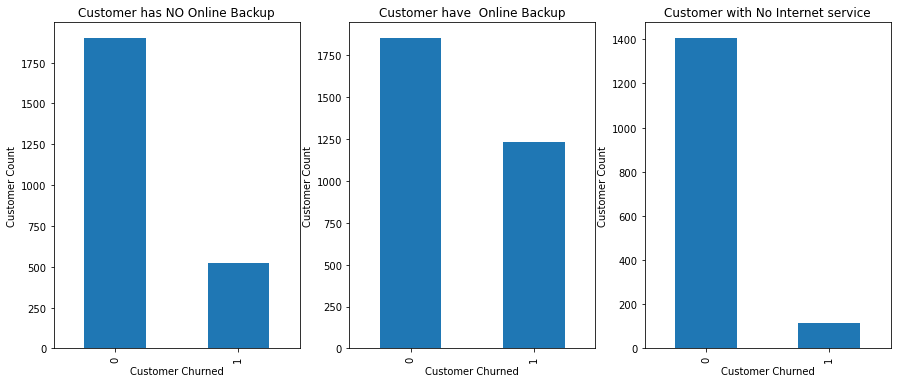

In [60]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_OnlineBackupNOChurn_Count.plot(kind="bar")
plt.title("Customer has NO Online Backup")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_OnlineBackupYESChurn_Count.plot(kind="bar")
plt.title("Customer have  Online Backup")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NoInternetServChurn_Count.plot(kind="bar")
plt.title("Customer with No Internet service")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

Based on the analysis , there is almost 72% of customers are churned, and they are subscribed Online Backup service

# DeviceProtection

From the dataset there is only 34% customers subscribe the Device protection Service

In [61]:
df_DeviceProtection=df2['DeviceProtection'].value_counts()
df_DeviceProtection

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [62]:
df2['DeviceProtection'].replace(to_replace='No', value=0, inplace=True)# replace the NO Yes No internet service with 0 1 2
df2['DeviceProtection'].replace(to_replace='Yes',  value=1, inplace=True)
df2['DeviceProtection'].replace(to_replace='No internet service',  value=2, inplace=True)

In [63]:
df_DeviceProtectionNO=df2[df2['DeviceProtection']==0]  # No=0 Yes=1 No internet service=2
df_DeviceProtectionNO
df_DeviceProtectionYES=df2[df2['DeviceProtection']==1]
df_DeviceProtectionYES
df_NoInternetServ=df2[df2['DeviceProtection']==2]
df_NoInternetServ

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,2,2,2,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [64]:
df_DeviceProtectionNOChurn_Count=df_DeviceProtectionNO['Churn'].value_counts()  # NO Device Protection Churn Count
df_DeviceProtectionNOChurn_Count

0    1883
1    1211
Name: Churn, dtype: int64

In [65]:
df_DeviceProtectionYESChurn_Count=df_DeviceProtectionYES['Churn'].value_counts()  # Yes Device Protection Churn Count
df_DeviceProtectionYESChurn_Count

0    1873
1     545
Name: Churn, dtype: int64

In [66]:
df_NoInternetServChurn_Count=df_NoInternetServ['Churn'].value_counts()  # No Internet Service Churn Count
df_NoInternetServChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

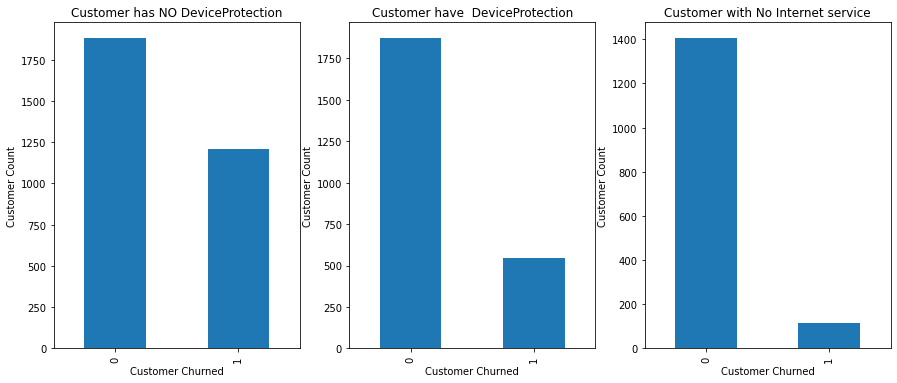

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_DeviceProtectionNOChurn_Count.plot(kind="bar")
plt.title("Customer has NO DeviceProtection")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_DeviceProtectionYESChurn_Count.plot(kind="bar")
plt.title("Customer have  DeviceProtection")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NoInternetServChurn_Count.plot(kind="bar")
plt.title("Customer with No Internet service")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

39%of customers are churned and they have subscribe No Device Protection service

# TechSupport

Only 29% customers are subscribed Technical support service 

In [68]:
df_TechSupport=df2['TechSupport'].value_counts()
df_TechSupport

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [69]:
df2['TechSupport'].replace(to_replace='No', value=0, inplace=True)# replace the NO Yes No internet service with 0 1 2
df2['TechSupport'].replace(to_replace='Yes',  value=1, inplace=True)
df2['TechSupport'].replace(to_replace='No internet service',  value=2, inplace=True)

In [70]:
df_TechSupportNO=df2[df2['TechSupport']==0]  # No=0 Yes=1 No internet service=2
df_TechSupportNO
df_TechSupportYES=df2[df2['TechSupport']==1]
df_TechSupportYES
df_NoInternetServ=df2[df2['TechSupport']==2]
df_NoInternetServ

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,2,2,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,2,2,2,2,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,2,2,2,2,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,2,2,2,2,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,2,2,2,2,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,2,2,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,2,2,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,2,2,2,2,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,2,2,2,2,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [71]:
df_TechSupportNOChurn_Count=df_TechSupportNO['Churn'].value_counts()  # NO Technical Support Churn Count
df_TechSupportNOChurn_Count

0    2026
1    1446
Name: Churn, dtype: int64

In [72]:
df_TechSupportYESChurn_Count=df_TechSupportYES['Churn'].value_counts()  # Yes Technical Support Churn Count
df_TechSupportYESChurn_Count

0    1730
1     310
Name: Churn, dtype: int64

In [73]:
df_NoInternetServChurn_Count=df_NoInternetServ['Churn'].value_counts()  # No Internet Service Churn Count
df_NoInternetServChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

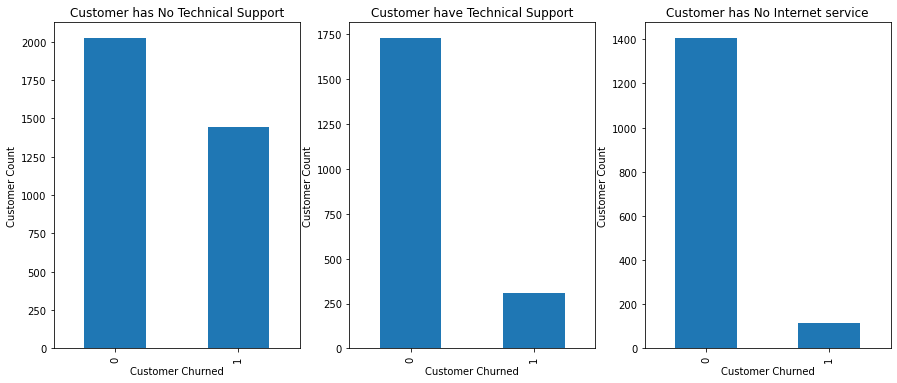

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_TechSupportNOChurn_Count.plot(kind="bar")
plt.title("Customer has No Technical Support")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_TechSupportYESChurn_Count.plot(kind="bar")
plt.title("Customer have Technical Support")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NoInternetServChurn_Count.plot(kind="bar")
plt.title("Customer has No Internet service")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

39%of customers are churned and they have subscribe No Technical Support service


# StreamingTV

30% customers are subscribed StreamingTv service

In [76]:
df_StreamingTV=df2['StreamingTV'].value_counts()
df_StreamingTV

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [77]:
df2['StreamingTV'].replace(to_replace='No', value=0, inplace=True)# replace the NO Yes No internet service with 0 1 2
df2['StreamingTV'].replace(to_replace='Yes',  value=1, inplace=True)
df2['StreamingTV'].replace(to_replace='No internet service',  value=2, inplace=True)

In [78]:
df_StreamingTVNO=df2[df2['StreamingTV']==0]  # No=0 Yes=1 No internet service=2
df_StreamingTVNO
df_StreamingTVYES=df2[df2['StreamingTV']==1]
df_StreamingTVYES
df_NoInternetServ=df2[df2['StreamingTV']==2]
df_NoInternetServ

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,2,2,2,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,2,2,2,2,2,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,2,2,2,2,2,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,2,2,2,2,2,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,2,2,2,2,2,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,2,2,2,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,2,2,2,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,2,2,2,2,2,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,2,2,2,2,2,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [79]:
df_StreamingTVNOChurn_Count=df_StreamingTVNO['Churn'].value_counts()  # NO StreamingTv Churn Count
df_StreamingTVNOChurn_Count

0    1867
1     942
Name: Churn, dtype: int64

In [80]:
df_StreamingTVYesChurn_Count=df_StreamingTVYES['Churn'].value_counts()  # YES StreamingTv Churn Count
df_StreamingTVYesChurn_Count

0    1889
1     814
Name: Churn, dtype: int64

In [81]:
df_NoInternetServChurn_Count=df_NoInternetServ['Churn'].value_counts()  # No Internet Service Churn Count
df_NoInternetServChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

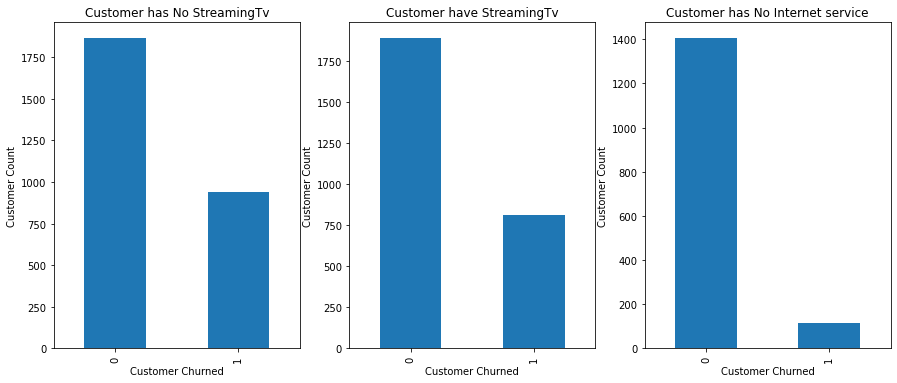

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_StreamingTVNOChurn_Count.plot(kind="bar")
plt.title("Customer has No StreamingTv")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_StreamingTVYesChurn_Count.plot(kind="bar")
plt.title("Customer have StreamingTv")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NoInternetServChurn_Count.plot(kind="bar")
plt.title("Customer has No Internet service")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

from the customer with streamingTv service there is 30% of customers are chruned

# StreamingMovies

Almost 39% customers subscibed the  streaming Movie services

In [83]:
df_StreamingMV=df2['StreamingMovies'].value_counts()
df_StreamingMV

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [86]:
df2['StreamingMovies'].replace(to_replace='No', value=0, inplace=True)# replace the NO Yes No internet service with 0 1 2
df2['StreamingMovies'].replace(to_replace='Yes',  value=1, inplace=True)
df2['StreamingMovies'].replace(to_replace='No internet service',  value=2, inplace=True)

In [87]:
df_StreamingMVNo=df2[df2['StreamingMovies']==0]  # No=0 Yes=1 No internet service=2
df_StreamingMVNo
df_StreamingMVYes=df2[df2['StreamingMovies']==1]
df_StreamingMVYes
df_NoInternetServ=df2[df2['StreamingMovies']==2]
df_NoInternetServ

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,2,2,2,2,Two year,No,Credit card (automatic),18.95,326.80,0
16,Female,0,No,No,52,Yes,No,2,2,2,2,2,2,2,One year,No,Mailed check,20.65,1022.95,0
21,Male,0,Yes,No,12,Yes,No,2,2,2,2,2,2,2,One year,No,Bank transfer (automatic),19.80,202.25,0
22,Male,0,No,No,1,Yes,No,2,2,2,2,2,2,2,Month-to-month,No,Mailed check,20.15,20.15,1
33,Male,0,No,No,1,Yes,No,2,2,2,2,2,2,2,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,2,2,2,2,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,2,2,2,2,Two year,No,Mailed check,20.15,826.00,0
7020,Male,0,Yes,Yes,12,Yes,No,2,2,2,2,2,2,2,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,Female,0,No,No,2,Yes,No,2,2,2,2,2,2,2,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [88]:
df_StreamingMVNOChurn_Count=df_StreamingMVNo['Churn'].value_counts()  # NO StreamingMovie Churn Count
df_StreamingMVNOChurn_Count

0    1843
1     938
Name: Churn, dtype: int64

In [89]:
df_StreamingMVYesChurn_Count=df_StreamingMVYes['Churn'].value_counts()  # Yes StreamingMovie Churn Count
df_StreamingMVYesChurn_Count

0    1913
1     818
Name: Churn, dtype: int64

In [90]:
df_NoInternetServChurn_Count=df_NoInternetServ['Churn'].value_counts()  # No Internet Service Churn Count
df_NoInternetServChurn_Count

0    1407
1     113
Name: Churn, dtype: int64

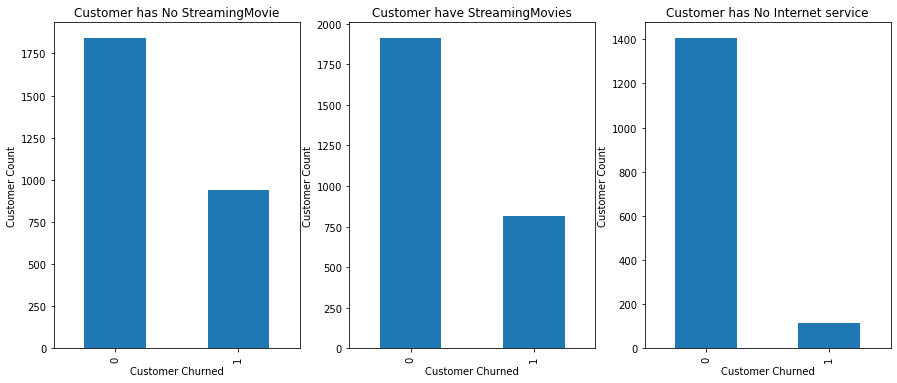

In [91]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_StreamingMVNOChurn_Count.plot(kind="bar")
plt.title("Customer has No StreamingMovie")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_StreamingMVYesChurn_Count.plot(kind="bar")
plt.title("Customer have StreamingMovies")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_NoInternetServChurn_Count.plot(kind="bar")
plt.title("Customer has No Internet service")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

from the customer with streamingMovie service there is 30% of customers are chruned

# Contract

The company provide three types of Contract month to month, Two year, One year.From the set there is 55% of customers are type of month to month contract, 24% are the type of Two Year contract and remaining are (21%) of One year contarct

In [92]:
df_Contract=df2['Contract'].value_counts()
df_Contract

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [93]:
df2['Contract'].replace(to_replace='Month-to-month', value=0, inplace=True)# replace the Month-to-month, One year,Two year with 0 1 2
df2['Contract'].replace(to_replace='One year',  value=1, inplace=True)
df2['Contract'].replace(to_replace='Two year',  value=2, inplace=True)

In [94]:
df_ContractM2M=df2[df2['Contract']==0]  # 0=Month-to-month,1=One year,2=Two year 
df_ContractM2M
df_Contract1Yr=df2[df2['Contract']==1]
df_Contract1Yr
df_Contract2Yr=df2[df2['Contract']==2]
df_Contract2Yr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,2,2,2,2,2,2,2,2,No,Credit card (automatic),18.95,326.80,0
15,Female,0,Yes,Yes,69,Yes,Yes,1,0,0,1,1,1,1,2,No,Credit card (automatic),113.25,7895.15,0
17,Male,0,No,Yes,71,Yes,Yes,1,0,1,1,0,1,1,2,No,Bank transfer (automatic),106.70,7382.25,0
23,Female,0,Yes,No,58,Yes,Yes,0,1,0,0,1,0,0,2,Yes,Credit card (automatic),59.90,3505.10,0
28,Male,0,Yes,No,72,Yes,Yes,0,0,0,1,1,1,1,2,Yes,Credit card (automatic),90.25,6369.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,2,2,2,2,2,2,2,2,No,Bank transfer (automatic),20.65,1020.75,0
7019,Female,0,No,No,39,Yes,No,2,2,2,2,2,2,2,2,No,Mailed check,20.15,826.00,0
7028,Female,0,Yes,No,68,Yes,No,0,1,0,0,1,1,0,2,No,Bank transfer (automatic),64.10,4326.25,0
7037,Female,0,No,No,72,Yes,No,2,2,2,2,2,2,2,2,Yes,Bank transfer (automatic),21.15,1419.40,0


In [95]:
df_ContractM2MChurn_Count=df_ContractM2M['Churn'].value_counts()  # Month to month Churn Count
df_ContractM2MChurn_Count

0    2220
1    1655
Name: Churn, dtype: int64

In [96]:
df_Contract1YrChurn_Count=df_Contract1Yr['Churn'].value_counts()  # 1 year Churn Count
df_Contract1YrChurn_Count

0    1306
1     166
Name: Churn, dtype: int64

In [97]:
df_Contract2YrChurn_Count=df_Contract2Yr['Churn'].value_counts()  # 2 year Churn Count
df_Contract2YrChurn_Count

0    1637
1      48
Name: Churn, dtype: int64

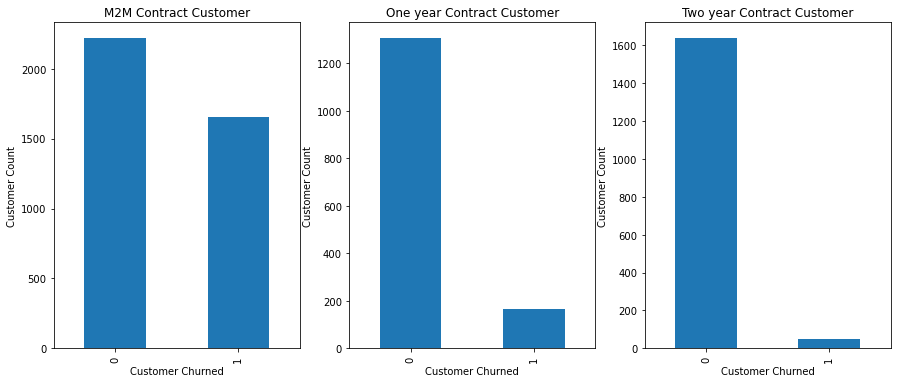

In [98]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_ContractM2MChurn_Count.plot(kind="bar")
plt.title("M2M Contract Customer")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_Contract1YrChurn_Count.plot(kind="bar")
plt.title("One year Contract Customer")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_Contract2YrChurn_Count.plot(kind="bar")
plt.title("Two year Contract Customer")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

From the graph, there is high range of customers are churned from month to month contarct (42%)

# PaperlessBilling

59% of customers are using the PaperlessBilling service

In [100]:
df_PaperlessBilling=df2['PaperlessBilling'].value_counts()
df_PaperlessBilling

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [101]:
df2['PaperlessBilling'].replace(to_replace='No', value=0, inplace=True)# replace the No, Yes 0 1 
df2['PaperlessBilling'].replace(to_replace='Yes',  value=1, inplace=True)

In [102]:
df_PaperlessBillingNo=df2[df2['PaperlessBilling']==0]  # 0=No,1=Yes
df_PaperlessBillingNo
df_PaperlessBillingYs=df2[df2['PaperlessBilling']==1]
df_PaperlessBillingYs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,0,1,0,0,0,0,0,0,1,Electronic check,29.85,29.85,0
2,Male,0,No,No,2,Yes,No,0,0,0,0,0,0,0,0,1,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,1,1,1,0,0,0,0,0,1,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,1,1,1,1,0,1,1,0,1,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,1,1,0,0,0,1,0,0,1,Credit card (automatic),89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,0,0,1,1,1,1,1,1,1,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,1,1,0,1,0,1,1,1,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,0,0,1,0,0,0,0,0,1,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,1,1,1,0,0,0,0,0,1,Mailed check,74.40,306.60,1


In [103]:
df_PaperlessBillingNoChurn_Count=df_PaperlessBillingNo['Churn'].value_counts()  # No PaperBill Churn Count
df_PaperlessBillingNoChurn_Count

0    2395
1     469
Name: Churn, dtype: int64

In [104]:
df_PaperlessBillingYsChurn_Count=df_PaperlessBillingYs['Churn'].value_counts()  # No PaperBill Churn Count
df_PaperlessBillingYsChurn_Count

0    2768
1    1400
Name: Churn, dtype: int64

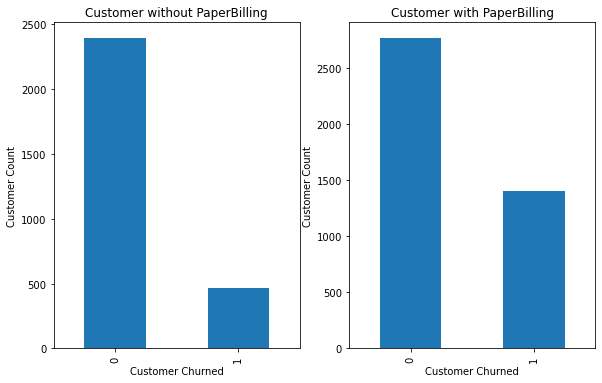

In [105]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_PaperlessBillingNoChurn_Count.plot(kind="bar")
plt.title("Customer without PaperBilling")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_PaperlessBillingYsChurn_Count.plot(kind="bar")
plt.title("Customer with PaperBilling")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

# PaymentMethod

In [106]:
df_PaymentMethod=df2['PaymentMethod'].value_counts()
df_PaymentMethod

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [113]:
df2.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  0        1284
                           1         258
Credit card (automatic)    0        1289
                           1         232
Electronic check           0        1294
                           1        1071
Mailed check               0        1296
                           1         308
Name: Churn, dtype: int64

C:\Users\Butterfly\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

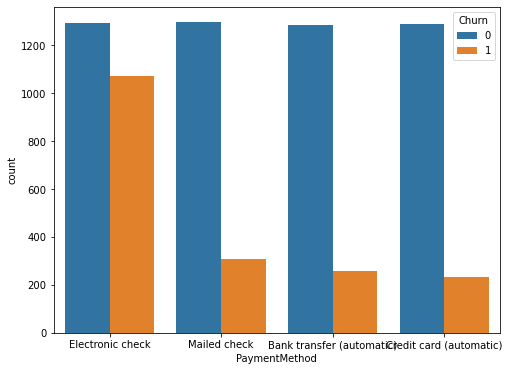

In [116]:
plt.figure(figsize=(8,6))
sns.countplot('PaymentMethod',data = df2,hue='Churn')

In [118]:
df2[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

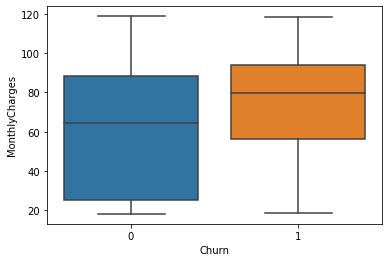

In [119]:
sns.boxplot(y='MonthlyCharges',x='Churn',data=df2)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

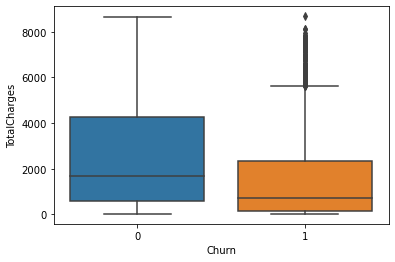

In [120]:
sns.boxplot(y='TotalCharges',x='Churn',data=df2)